# Reprojecting and clipping

## We will learn:
how to change the crs of a geo dataframe
how to clip different geometries using polygons

## Data 
fill in later

In [3]:
# import packages
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# import a single function
from shapely.geometry import box

In [4]:
pd.set_option("display.max.columns", None)

In [5]:
## Import data

In [17]:
states = gpd.read_file('data/tl_2022_us_state/tl_2022_us_state.shp')

places = gpd.read_file('data/ne_50m_populated_places.shp')

roads = gpd.read_file('data/ne_10m_roads.shp')

In [18]:
#states.columns = states.columns.str.lower

TypeError: 'method' object is not iterable

/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

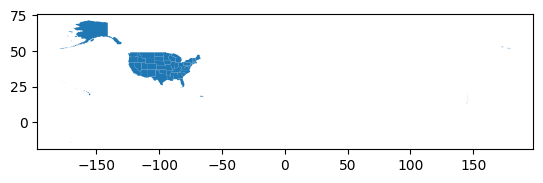

In [15]:
# prep alaska polygon

states.crs
states.head(3)
states.plot()

In [21]:
#just alaska

alaska = states[states.NAME == 'Alaska']

## Reprojecting

issue: islands elongating the map
fix: reproject the alaska geodataframe

Changing the crs of your data

we will reproject to EPSG:3338, better for working with Alaska

use the to crs method

syntax:

updated_geodf = geodf.to_crs(new_crs)

new_crs: object of type crs or a string representing a crs (ex epsg:3338)

In [22]:
# change to projected crs optomized for Alaska
alaska = alaska.to_crs('epsg:3338')

/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

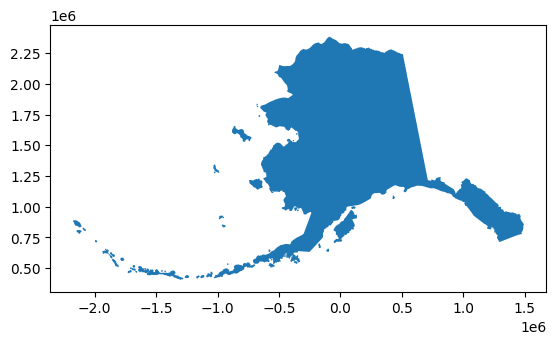

In [25]:
alaska.plot()

In [27]:
# check crs info
alaska.crs

## projected vs geographic
#projected into 2d plane and now we can use the xy coordinates as meters instead of degrees!!

<Projected CRS: EPSG:3338>
Name: NAD83 / Alaska Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Alaska.
- bounds: (172.42, 51.3, -129.99, 71.4)
Coordinate Operation:
- name: Alaska Albers (meters)
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [29]:
print(places.crs)
places.head(3)

epsg:4326


,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,NAMEASCII,ADM0CAP,CAPIN,WORLDCITY,MEGACITY,SOV0NAME,SOV_A3,ADM0NAME,ADM0_A3,ADM1NAME,ISO_A2,NOTE,LATITUDE,LONGITUDE,POP_MAX,POP_MIN,POP_OTHER,RANK_MAX,RANK_MIN,MEGANAME,LS_NAME,MAX_POP10,MAX_POP20,MAX_POP50,MAX_POP300,MAX_POP310,MAX_NATSCA,MIN_AREAKM,MAX_AREAKM,MIN_AREAMI,MAX_AREAMI,MIN_PERKM,MAX_PERKM,MIN_PERMI,MAX_PERMI,MIN_BBXMIN,MAX_BBXMIN,MIN_BBXMAX,MAX_BBXMAX,MIN_BBYMIN,MAX_BBYMIN,MIN_BBYMAX,MAX_BBYMAX,MEAN_BBXC,MEAN_BBYC,TIMEZONE,UN_FID,POP1950,POP1955,POP1960,POP1965,POP1970,POP1975,POP1980,POP1985,POP1990,POP1995,POP2000,POP2005,POP2010,POP2015,POP2020,POP2025,POP2050,MIN_ZOOM,WIKIDATAID,WOF_ID,CAPALT,NAME_EN,NAME_DE,NAME_ES,NAME_FR,NAME_PT,NAME_RU,NAME_ZH,LABEL,NAME_AR,NAME_BN,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_SV,NAME_TR,NAME_VI,NE_ID,NAME_FA,NAME_HE,NAME_UK,NAME_UR,NAME_ZHT,GEONAMESID,FCLASS_ISO,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,10,1,5,Admin-1 region capital,Bombo,NaN,NaN,Bombo,0,NaN,0,0,Uganda,UGA,Uganda,UGA,Bamunanika,UG,NaN,0.583299,32.533300,75000,21000,0.0,8,7,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,Q4940747,1141906025,0,Bombo,Bombo,Bombo,Bombo,Bombo,Бомбо,邦博,NaN,بومبو,বোম্বো,Μπόμπο,बॉम्बो,Bombo,Bombo,Bombo,ボンボ,봄보,Bombo,Bombo,Bombo,Bombo,Bombo,1159113923,بمبو,בומבו,Бомбо,بومبو,邦博,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (32.53330 0.58330)
1,10,1,5,Admin-1 region capital,Fort Portal,NaN,NaN,Fort Portal,0,NaN,0,0,Uganda,UGA,Uganda,UGA,Kabarole,UG,NaN,0.671004,30.275002,42670,42670,0.0,7,7,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Africa/Kampala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,Q500107,421174009,0,Fort Portal,Fort Portal,Fort Portal,Fort Portal,Fort Portal,Форт-Портал,波特爾堡,NaN,فورت بورتال,ফোর্ট পোর্টাল,Φορτ Πορτάλ,फोर्ट पोर्टल,Fort Portal,Fort Portal,Fort Portal,フォート・ポータル,포트포털,Fort Portal,Fort Portal,Fort Portal,Fort Portal,Fort Portal,1159113959,فورت پورتال,פורט פורטל,Форт-Портал,فورٹ پورٹل,波特爾堡,233476.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (30.27500 0.67100)
2,10,1,3,Admin-1 region capital,Potenza,NaN,NaN,Potenza,0,NaN,0,0,Italy,ITA,Italy,ITA,Basilicata,IT,NaN,40.642002,15.798997,69060,69060,0.0,8,8,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Europe/Rome,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,Q3543,101752567,0,Potenza,Potenza,Potenza,Potenza,Potenza,Потенца,波坦察,NaN,بوتنسا,পোটেঞ্জা,Ποτέντσα,पोटेंजा,Potenza,Potenza,Potenza,ポテンツァ,포텐차,Potenza,Potenza,Potenza,Potenza,Potenza,1159117259,پوتنزا,פוטנצה,Потенца,پوتینتسا,波坦察,3170027.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (15.79900 40.64200)


epsg:4326/WGS84 is the most used crs for global data

/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


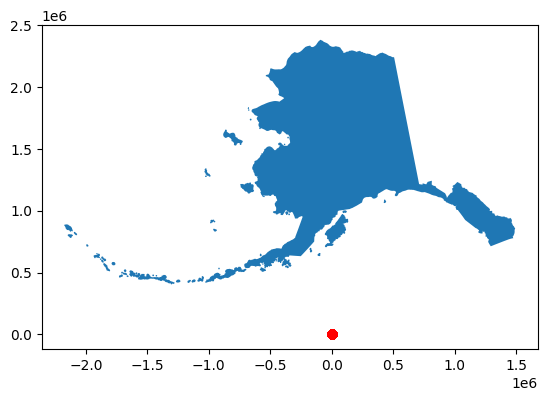

In [32]:
fig, ax = plt.subplots()

alaska.plot(ax=ax)
places.plot(ax=ax, color='red')

plt.show()

## lesson, we always need the same crs

## classic geospatial mistake

In [33]:
print(alaska.crs)
print(places.crs)

epsg:3338
epsg:4326


In [35]:
places = places.to_crs(alaska.crs) # reproject to the crs in the other geodataframe

In [36]:
print(alaska.crs==places.crs)

True


/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


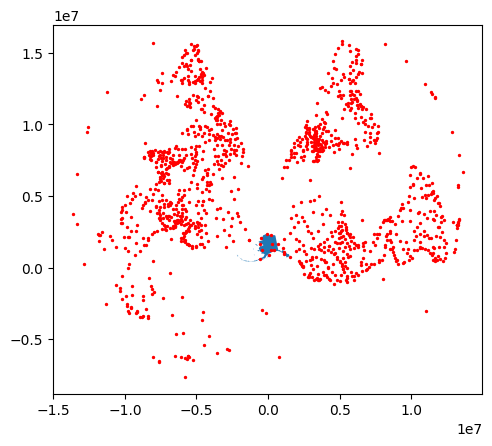

In [38]:
fig, ax = plt.subplots()

alaska.plot(ax=ax)
places.plot(ax=ax, color='red', markersize=2)

plt.show()

## clip data

clipping means using a polygon or polygons to only select geospatial data within those polygons

use the clip function

syntax:
updated_geodf = gpd.clip(geodf, mask)

geodf is what we want to clip
mask must be in the same crs!!!!!


In [40]:
ak_places = gpd.clip(places, alaska)

ImportError: Spatial indexes require either `rtree` or `pygeos`. See installation instructions at https://geopandas.org/install.html

In [41]:
## when this works, map it subbing in ak_places for places

In [45]:
## add in roads

print(roads.crs) #um... that wasnt supposed to happen....

None


In [44]:
roads = gpd.read_file('data/ne_10m_roads.shp')

# data selection

It is god practice to try to reduce your data before modifying it geospatially

to create a box we use the box function from shapely 

syntax
box(minx, miny, maxx, maxy)

if we want to use bounds fro geodataframe can use this syntax

syntax
box(*gdf.total_bounds)

In [47]:
# make an array with the (minx, miny, maxx, maxy) for alaska
alaska.total_bounds

array([-2175729.73162241,   404545.10791528,  1493082.30904445,
        2383808.43520816])

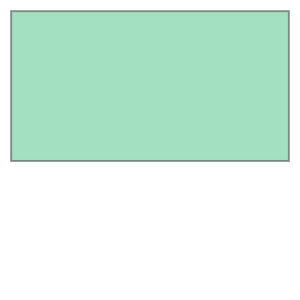

In [51]:
# * is an unpacking operator, unpacks the contents of alaska.total_bounds and adds parameters to box
bbox = box(*alaska.total_bounds)
bbox

In [52]:
# this is not a geodataframe, its a polygon floating in space

In [53]:
ak_bbox = gpd.GeoDataFrame(geometry = [bbox],
                          crs = alaska.crs)
ak_bbox

,geometry
0,"POLYGON ((1493082.309 404545.108, 1493082.309 ..."


In [55]:
# one liner to reproject and clip

ak_roads = gpd.clip(usa_roads.to_crs, ak_bbox)

ak_roads.plot()

NameError: name 'usa_roads' is not defined

In [ ]:
# make a plot 

fig, ax = plt.subplots(figsize=(12,8))

ax.axis('off')

# more stuff that I can't read